In [1]:
!pip install --upgrade tables
!pip install eli5
!pip install xgboost
!pip install hyperopt

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, KFold

import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
from hyperopt import hp, fmin, tpe, STATUS_OK

In [3]:
pwd

'/content'

In [5]:
cd "drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [6]:
!ls -l

total 60295
-rw------- 1 root root 60525650 Mar  3 00:01 cat.h5
drwx------ 2 root root     4096 Mar  2 23:44 data
-rw------- 1 root root   252463 Mar  4 22:58 day2_visualisation.ipynb
-rw------- 1 root root   293508 Mar  6 22:17 day3_simple_model.ipynb
-rw------- 1 root root   329838 Mar  6 22:15 day4_xgboost_features_engineering.ipynb
-rw------- 1 root root   332609 Mar  8 11:23 day5_xgboost_features_engineering.ipynb
-rw------- 1 root root     1066 Mar  2 23:43 LICENSE
-rw------- 1 root root       32 Mar  2 23:43 README.md


In [13]:
df = pd.read_hdf("data/car.h5")
df.shape

(106494, 155)

In [8]:
df.columns.values

NameError: ignored

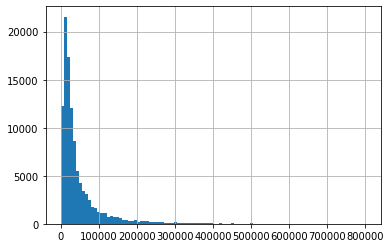

In [0]:
df["price_value"].hist(bins=100)

In [0]:
df["price_value"].max()

799900.0

In [0]:
df["price_value"].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
df["param_marka-pojazdu"].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [0]:
df.groupby('param_marka-pojazdu')['price_value'].mean()

param_marka-pojazdu
Acura         32349.250000
Aixam         26129.208955
Alfa Romeo    52053.311086
Aro           20800.000000
Asia          12500.000000
                  ...     
Yugo          47500.000000
Zaporożec      3900.000000
Zastava        2999.000000
Škoda         40068.437434
Żuk            4722.500000
Name: price_value, Length: 100, dtype: float64

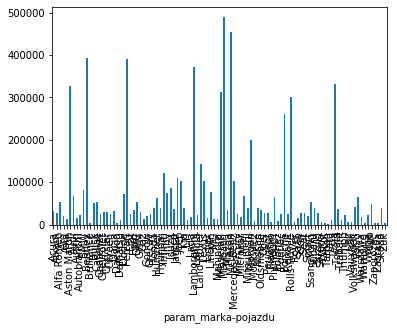

In [0]:
df.groupby('param_marka-pojazdu')['price_value'].agg(np.mean).plot(kind='bar')

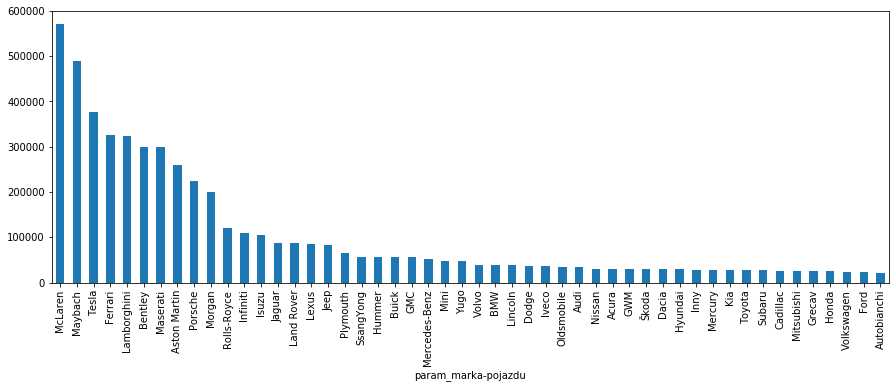

In [0]:
(
  df.groupby('param_marka-pojazdu')['price_value']
  .agg(np.median)
  .sort_values(ascending=False)
  .head(50)
).plot(kind='bar', figsize=(15,5))

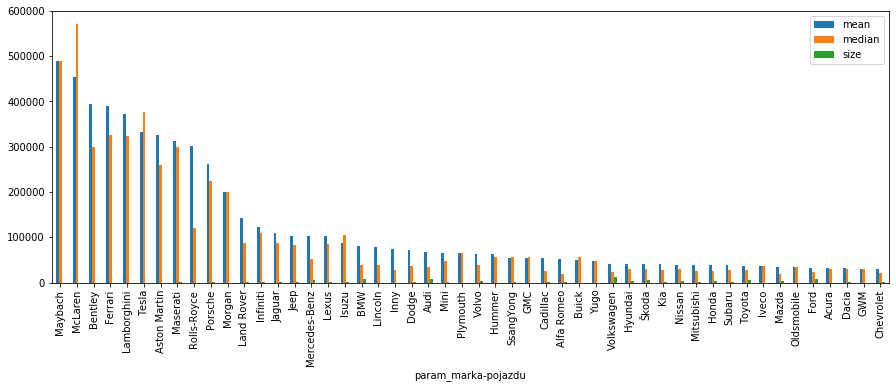

In [0]:
(
  df.groupby('param_marka-pojazdu')['price_value']
  .agg([np.mean, np.median, np.size])
  .sort_values(by='mean', ascending=False)
  .head(50)
).plot(kind='bar', figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa211fe0438>,
      dtype=object)

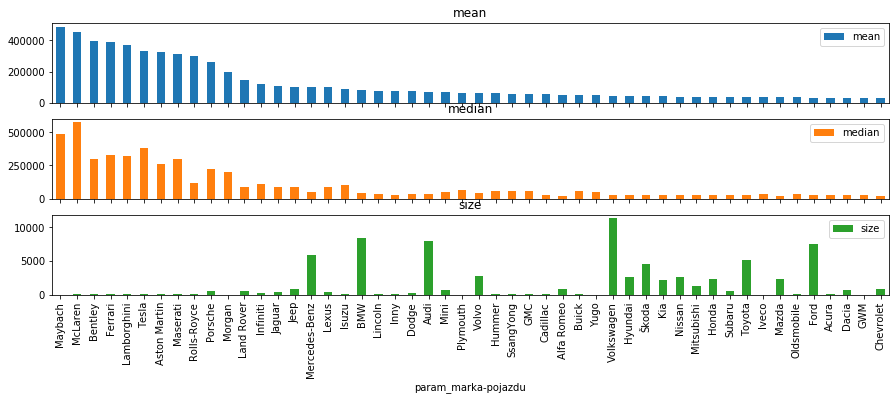

In [0]:
(
  df.groupby('param_marka-pojazdu')['price_value']
  .agg([np.mean, np.median, np.size])
  .sort_values(by='mean', ascending=False)
  .head(50)
).plot(kind='bar', figsize=(15,5), subplots=True)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=50):
  return (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

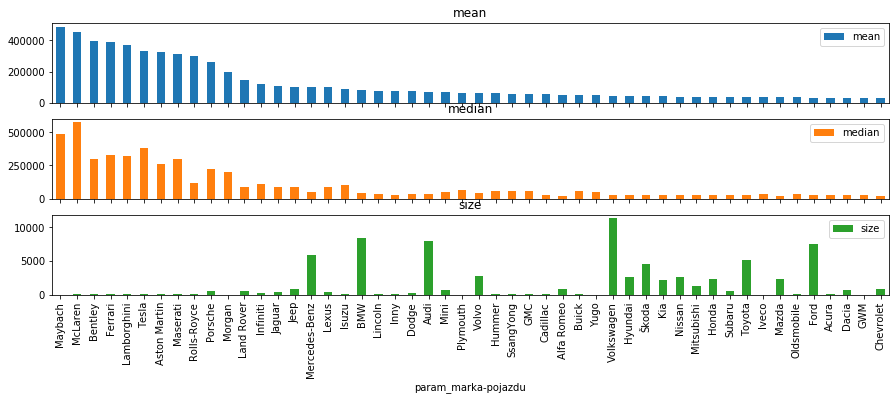

In [0]:
group_and_barplot('param_marka-pojazdu');

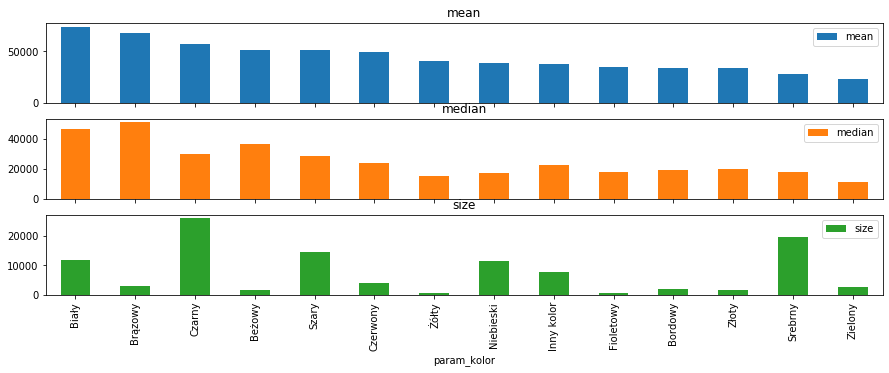

In [0]:
group_and_barplot('param_kolor',feat_sort='mean');

In [0]:
#wczytywanie danych

Wczytywanie danych


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car'

In [0]:
df = pd.read_hdf("data/car.h5")
df.shape

(106494, 155)

In [0]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model

In [0]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [0]:
feats = ['car_id'] 

X = df[ feats ].values
y = df[ ['car_id'] ].values

In [0]:
model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y, y_pred)

40104.125306754606

In [0]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [0]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [0]:
df['price_currency'].value_counts(normalize=True)*100

PLN    99.80844
EUR     0.19156
Name: price_currency, dtype: float64

In [0]:
print(df.shape)
df = df[ df['price_currency'] != 'EUR' ]
print(df.shape)

(106494, 155)
(106290, 155)


In [0]:
df.head()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,...,None,None,Firmy,90 KM,None,None,None,None,None,Benzyna+LPG,None,None,None,None,None,None,None,Logan,898 cm3,None,None,None,None,None,None,None,None,None,Inny kolor,None,None,Nowe,II (2012-),None,None,None,Tak,None,None,0
2,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-...","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,False,True,False,False,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,None,Tak,Osoby prywatnej,115 KM,None,Polska,None,None,None,Diesel,None,None,None,None,None,None,None,3008,1 560 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,I (2009-2016),None,None,None,Tak,None,None,2
3,"[Osobowe, Porsche, Cayenne, Porsche Cayenne II...","06:30, 4 marca 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",229500.0,"Kępińska 24a - 63-640 Bralin, kępiński, Wielko...",P.W. GRIB,Dealer,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,False,True,True,True,True,...,None,None,Firmy,262 KM,None,Niemcy,None,None,Tak,Diesel,Tak,None,None,None,None,None,None,Cayenne,3 000 cm3,None,None,None,None,None,None,None,None,None,Czarny,None,None,Używane,II (2010-),None,None,None,None,None,None,3
4,"[Osobowe, Peugeot, 308, Peugeot 308 T7 (2008-2...","08:46, 3 marca 2018",PLN,"Cena Brutto, Do negocjacji",19500.0,"Limanowa, limanowski, Małopolskie",None,Osoba prywatna,False,False,False,False,False,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,...,None,Tak,Osoby prywatnej,110 KM,None,Polska,None,None,Tak,Diesel,None,None,None,None,None,None,None,308,1

In [0]:
df['param_color'].factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Czarny', 'Srebrny', 'Złoty', 'Bordowy', 'Biały', 'Szary', 'Beżowy',
        'Zielony', 'Fioletowy', 'Niebieski', 'Inny kolor', 'Brązowy', 'Żółty'],
       dtype='object'))

In [0]:
df['param_color'].value_counts()

Srebrny       18
Czarny        13
Szary         12
Biały         11
Inny kolor     8
Niebieski      6
Zielony        4
Bordowy        3
Brązowy        3
Złoty          2
Beżowy         1
Żółty          1
Fioletowy      1
Name: param_color, dtype: int64

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
	if isinstance(df[feat][0],list): continue
	
	factorized_values = df[feat].factorize()[0]
	if SUFFIX_CAT  in feat:
		df[feat] = factorized_value
	else:
	  df[feat+ SUFFIX_CAT ] = factorized_values

In [15]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
len(cat_feats)

154

In [16]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]

len(cat_feats)

151

In [0]:
def run_model(model, feats):
  X = df[feats].values
  y = df['price_value'].values

  scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
  return np.mean(scores) , np.std(scores)

Decision Tree

In [0]:
model = DecisionTreeRegressor(max_depth=5)
run_model(model,cat_feats)

(-19695.13091100928, 148.72570644015792)

Random Forest

In [0]:
model = RandomForestRegressor(max_depth=5 , n_estimators=50, random_state=0)
run_model(model,cat_feats)

(-18718.657185256638, 64.5424578125788)

XGBoost


In [0]:
xgb_params = {
    'max_depth' : 5 , 
    'n_estimators' : 50, 
    'learning_rate' : 0.1,
    'seed':0
}
model = xgb.XGBRegressor(**xgb_params)

In [0]:

run_model(model, cat_feats)

[17:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-13108.379065811214, 74.32158265003798)

In [0]:
xgb_params = {
    'max_depth' : 5 , 
    'n_estimators' : 50, 
    'learning_rate' : 0.1,
    'seed':0
}
m = xgb.XGBRegressor(**xgb_params)

In [0]:


m.fit(X,y)
imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

[18:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
0.1194 ± 0.0031,param_napęd__cat
0.1132 ± 0.0032,param_rok-produkcji__cat
0.1090 ± 0.0025,param_stan__cat
0.0619 ± 0.0025,param_skrzynia-biegów__cat
0.0568 ± 0.0016,param_faktura-vat__cat
0.0489 ± 0.0014,param_moc__cat
0.0273 ± 0.0007,param_marka-pojazdu__cat
0.0242 ± 0.0013,feature_kamera-cofania__cat
0.0212 ± 0.0008,param_typ__cat
0.0174 ± 0.0008,param_pojemność-skokowa__cat


In [0]:
feats=['param_napęd__cat', 'param_rok-produkcji__cat', 'param_stan__cat', 'param_skrzynia-biegów__cat', 'param_faktura-vat__cat', 'param_moc__cat', 'param_marka-pojazdu__cat','feature_kamera-cofania__cat', 'param_typ__cat', 'param_pojemność-skokowa__cat','seller_name__cat','feature_wspomaganie-kierownicy__cat', 'param_model-pojazdu__cat', 'param_wersja__cat', 'param_kod-silnika__cat','feature_system-start-stop__cat','feature_asystent-pasa-ruchu__cat', 'feature_czujniki-parkowania-przednie__cat', 'feature_łopatki-zmiany-biegów__cat', 'feature_regulowane-zawieszenie__cat']
# less features
print(len(feats))
run_model(model, feats)

20
[22:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-13375.230420852275, 65.40441107118909)

In [0]:
df['param_rok-produkcji'].unique()

array(['2018', '2011', '2015', '2009', '2017', '2012', '2013', '2007',
       '2001', '2016', '2006', '2008', '2004', '1999', '2000', '2010',
       '2005', '2002', '1998', '2014', '2003', '1982', '1995', '1997',
       '1992', '1993', '1994', '1996', '1989', '1988', '1967', '1987',
       '1970', '1959', '1990', '1991', '1974', None, '1975', '1973',
       '1953', '1985', '1984', '1986', '1981', '1979', '1960', '1983',
       '1978', '1964', '1980', '1972', '1969', '1956', '1966', '1977',
       '1962', '1965', '1971', '1963', '1961', '1952', '1949', '1976',
       '1937', '1968', '1958', '1955', '1933', '1929', '1957', '1944',
       '1954', '1932', '1936', '1947', '1948'], dtype=object)

In [0]:
#year of production as category number
df['param_rok-produkcji__cat'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, -1, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75])

In [0]:
df['param_rok-produkcji']= df['param_rok-produkcji'].map(lambda x: -1 if str(x)=='None' else int(x) )

In [0]:
# param_rok-produkcji__cat changed to param_rok-produkcji

feats=['param_napęd__cat', 'param_rok-produkcji', 'param_stan__cat', 'param_skrzynia-biegów__cat', 'param_faktura-vat__cat', 'param_moc__cat', 'param_marka-pojazdu__cat','feature_kamera-cofania__cat', 'param_typ__cat', 'param_pojemność-skokowa__cat','seller_name__cat','feature_wspomaganie-kierownicy__cat', 'param_model-pojazdu__cat', 'param_wersja__cat', 'param_kod-silnika__cat','feature_system-start-stop__cat','feature_asystent-pasa-ruchu__cat', 'feature_czujniki-parkowania-przednie__cat', 'feature_łopatki-zmiany-biegów__cat', 'feature_regulowane-zawieszenie__cat']
# less features
print(len(feats))
run_model(model, feats)

20
[22:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-11308.885890938496, 27.868488259630677)

In [0]:
df['param_moc'].unique()

array(['90 KM', '115 KM', '262 KM', '110 KM', '310 KM', '105 KM',
       '140 KM', '175 KM', '125 KM', '185 KM', '190 KM', '440 KM',
       '141 KM', '200 KM', '224 KM', '75 KM', '99 KM', '184 KM', '109 KM',
       '233 KM', '116 KM', '68 KM', '286 KM', '126 KM', '160 KM',
       '135 KM', '120 KM', '272 KM', None, '150 KM', '180 KM', '136 KM',
       '102 KM', '131 KM', '218 KM', '245 KM', '170 KM', '112 KM',
       '250 KM', '252 KM', '73 KM', '100 KM', '313 KM', '101 KM',
       '285 KM', '70 KM', '383 KM', '174 KM', '277 KM', '132 KM',
       '130 KM', '215 KM', '60 KM', '330 KM', '163 KM', '177 KM', '98 KM',
       '78 KM', '189 KM', '156 KM', '143 KM', '69 KM', '113 KM', '65 KM',
       '122 KM', '82 KM', '251 KM', '95 KM', '197 KM', '235 KM', '238 KM',
       '171 KM', '381 KM', '400 KM', '178 KM', '80 KM', '165 KM', '85 KM',
       '258 KM', '142 KM', '204 KM', '124 KM', '55 KM', '144 KM',
       '231 KM', '248 KM', '152 KM', '181 KM', '210 KM', '340 KM',
       '129 KM', '147 

In [0]:
df['param_moc'] = df['param_moc'].map(lambda x: -1 if str(x)=='None' else int(x.split(' ')[0]))

In [0]:
df['param_moc'].unique()

array([ 90, 115, 262, 110, 310, 105, 140, 175, 125, 185, 190, 440, 141,
       200, 224,  75,  99, 184, 109, 233, 116,  68, 286, 126, 160, 135,
       120, 272,  -1, 150, 180, 136, 102, 131, 218, 245, 170, 112, 250,
       252,  73, 100, 313, 101, 285,  70, 383, 174, 277, 132, 130, 215,
        60, 330, 163, 177,  98,  78, 189, 156, 143,  69, 113,  65, 122,
        82, 251,  95, 197, 235, 238, 171, 381, 400, 178,  80, 165,  85,
       258, 142, 204, 124,  55, 144, 231, 248, 152, 181, 210, 340, 129,
       147,  50,  54, 290, 306, 193,  77, 164,  96, 194, 111, 166, 206,
       118, 360, 211, 271, 455, 280, 106, 114, 421,  74, 213, 121, 275,
       435, 384, 326,  88, 220, 260,  64,  86, 128, 256, 240, 244, 162,
       237, 350,  35, 265, 202, 133,  83, 117, 146,  92, 192, 145, 525,
       254, 182, 328, 367, 148, 456,  97, 270, 107, 108, 203, 155,  94,
        93, 241,  20,  71, 173,  58, 205, 236,   1, 557,  84, 457,  72,
       295, 134, 425, 228,  81, 230, 201,  87, 234, 299, 585, 20

In [0]:
# param_rok-produkcji__cat changed to param_rok-produkcji

feats=['param_napęd__cat', 'param_rok-produkcji', 'param_stan__cat', 'param_skrzynia-biegów__cat', 'param_faktura-vat__cat', 'param_moc', 'param_marka-pojazdu__cat','feature_kamera-cofania__cat', 'param_typ__cat', 'param_pojemność-skokowa__cat','seller_name__cat','feature_wspomaganie-kierownicy__cat', 'param_model-pojazdu__cat', 'param_wersja__cat', 'param_kod-silnika__cat','feature_system-start-stop__cat','feature_asystent-pasa-ruchu__cat', 'feature_czujniki-parkowania-przednie__cat', 'feature_łopatki-zmiany-biegów__cat', 'feature_regulowane-zawieszenie__cat']
# less features
print(len(feats))
run_model(model, feats)

20
[22:05:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-9716.450230340148, 62.2164408321879)

In [0]:
df['param_pojemność-skokowa'].unique()

array(['898 cm3', '1 560 cm3', '3 000 cm3', ..., '5 992 cm3', '1 966 cm3',
       '142 280 cm3'], dtype=object)

In [0]:
df['param_pojemność-skokowa']= df['param_pojemność-skokowa'].map(lambda x: -1 if str(x)=='None' else int(x.split('cm')[0].replace(' ','')))

In [0]:
df['param_pojemność-skokowa'].unique()

array([   898,   1560,   3000, ...,   5992,   1966, 142280])

In [24]:
feats=['param_napęd__cat', 'param_rok-produkcji', 'param_stan__cat', 'param_skrzynia-biegów__cat', 'param_faktura-vat__cat', 'param_moc', 'param_marka-pojazdu__cat','feature_kamera-cofania__cat', 'param_typ__cat', 'param_pojemność-skokowa','seller_name__cat','feature_wspomaganie-kierownicy__cat', 'param_model-pojazdu__cat', 'param_wersja__cat', 'param_kod-silnika__cat','feature_system-start-stop__cat','feature_asystent-pasa-ruchu__cat', 'feature_czujniki-parkowania-przednie__cat', 'feature_łopatki-zmiany-biegów__cat', 'feature_regulowane-zawieszenie__cat']
# less features
print(len(feats))
run_model(model, feats)

20
[11:29:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-9569.227198767323, 72.83561801421891)

In [35]:
def obj_func(params):
  print("Training with params:")
  print(params)

  mean_mae, score_std = run_model(xgb.XGBRegressor(**params), feats)
  
  return {'loss': np. abs(mean_mae), 'status': STATUS_OK}

  #return {'loss': np. abs(mean_mae), 'status': STATUS_FAILED}
  #try:
	#  mean_mae, score_std = run_model(xgb.XGBRegressor(**params), feats)
	#except:
	#  return {'loss': np. abs(mean_mae), 'status': STATUS_FAILED}

#space

xgb_reg_params = {
	'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
	'max_depth':	hp.choice('max_depth', np.arange(5,16,1, dtype=int)),
	'subsample':	hp.quniform('subsample', 0.5, 1, 0.05),
	'colsample_bytree': hp.quniform('colsample_bytree', 0.5,1, 0.05),
	'objective':	'reg:squarederror',
	'n_estimators': 100,	
	'seed':0,
}
best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=25)

Training with params:
{'colsample_bytree': 0.55, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.6000000000000001}
Training with params:
{'colsample_bytree': 0.9, 'learning_rate': 0.25, 'max_depth': 8, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.6000000000000001}
Training with params:
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.6000000000000001}
Training with params:
{'colsample_bytree': 0.75, 'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.7000000000000001}
Training with params:
{'colsample_bytree': 0.6000000000000001, 'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params:
{'colsample_bytree': 0.8500000000000